# 09 - 2 순환 신경망으로 IMDB 리뷰 분류

### IMDB 리뷰 데이터셋

IMDB 리뷰 데이터셋은 유명한 인터넷 영화 데이터베이스인 imdb.com에서 수집한 리뷰를 감상평에 따라 긍정과 부정으로 분류해 놓은 데이터 셋이다.

사실 텍스트 자체를 신경망에 전달하지는 않는다. 컴퓨터에서 처리하는 모든 것은 어떤 숫자 데이터이다. 텍스트 데이터의 경우 단어를 숫자 데이터로 바꾸는 일반적인 방법은 데이터에 등장하는 단어마다 고유한 정수를 부여하는 것이다.

일반적으로 영어 문장은 모두 소문자로 바꾸고 구둣점을 삭제한 다음 공백을 기준으로 분리한다. 이렇게 분리된 단어를 토큰(token)이라고 부른다. 하나의 샘플은 여러 개의 토큰으로 이루어져 있고 1개의 토큰이 하나의 타임스텝에 해당한다. 토큰에 할당하는 정수 중에 몇 개는 특정한 용도로 예약되어 있는 경우가 많다. 예를 들어 0은 패딩, 1은 문장의 시작, 2는 어휘 사전에 없는 토큰을 나타낸다.

실제 IMDB 리뷰 데이터셋은 영어로 된 문장이지만 편리하게도 텐서플로에는 이미 정수로 바꾼 데이터가 포함되어있다. 여기에서는 전체 데이터셋에서 가장 자주 등장하는 단어 300개만 사용하자. 이렇게 하기 위해 load_data() 함수의 num_words 매개변수를 300으로 지정한다.

In [1]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words = 300)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
#훈련세트, 테스트 세트 크기 확인
print(train_input.shape, test_input.shape)

(25000,) (25000,)


IMDB 리뷰 텍스트는 길이가 제각각이다. 따라서 고정 크기의 2차원 배열에 담기보다는 리뷰마다 별도의 파이썬 리스트로 담아야 메모리를 효율적으로 사용할 수 있다. 즉 이 데이터는 개별 리뷰를 담은 파이썬 리스트 객체로 이루어진 넘파이 배열이다. 넘파이 배열은 정수나 실수 외에도 파이썬 객체를 담을 수 있다.

In [3]:
print(len(train_input[0]))

218


첫 번째 리뷰의 길이는 218개의 토큰으로 이루어져있다.

In [4]:
print(len(train_input[1]))

189


리뷰마다 각각 길이가 다른 것을 확인해볼 수 있다. 이제 첫 리뷰에 담긴 내용을 출력해보자.

In [5]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 284, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


IMDB 리뷰 데이터는 이미 정수로 변환되어 있다. 앞서 num_word = 300으로 지정했기 때문에 어휘 사전에는 300개의 단어만 들어가 있다. 따라서 어휘 사전에 없는 단어는 모두 2로 표시되어 나타난다.

이번엔 타깃 데이터를 출력해보자.

In [6]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


해결할 문제는 리뷰가 긍정인지 부정인지를 판단하는 것이다. 그러면 이진 분류 문제로 볼 수 있다.

이제 검증세트를 나누자.

In [7]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size = 0.2, random_state = 42
)

먼저 각 리뷰의 길이를 계산해 넘파이 배열에 담자. 이렇게 하는 이유는 평균적인 리뷰의 길이와 가장 짧은 리뷰의 길이 그리고 가장 긴 리뷰의 길이를 확인하고 싶기 때문이다.

In [8]:
import numpy as np
lengths = np.array([len(x) for x in train_input])

lengths 배열이 준비되었다. 이제 리뷰길이의 평균값과 중간값을 구해보자.

In [9]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


리뷰의 평균 단어 개수는 239개이고 중간값이 178인 것으로 보아 이 리뷰 길이 데이터는 한쪽에 치우친 분포를 보일 것이다.히스토그램으로 표현해보자.

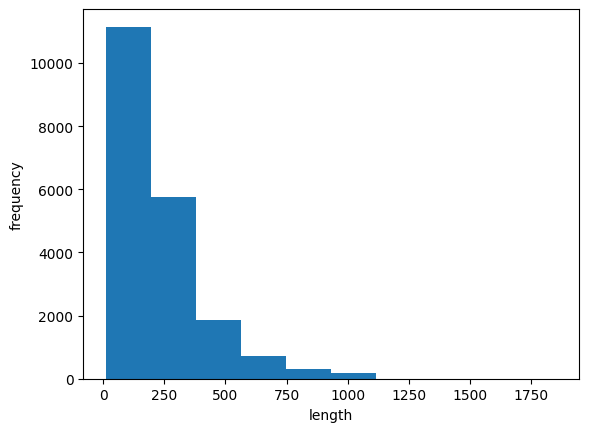

In [10]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

역시 한쪽으로 치우쳤다. 대부분의 리뷰 길이는 300 미만이다. 평균이 중간값보다 높은 이유는 오른쪽 끝에 아주 큰 데이터가 있기 때문이다.

리뷰는 대부분 짧아서 이 예제에서는 중간값보다 훨씬 짧은 100개의 단어만 사용하자. 하지만 여전히 100개의 단어보다 작은 리뷰가 있다. 이런 리뷰들의 길이를 100에 맞추기 위해 패딩이 필요하다. 보통 패딩을 나타내는 토큰으로는 0을 사용한다.

이러한 작업을 편하게 할 수 있는 도구로 pad_sequences() 함수를 제공한다.

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

결과를 보자.

In [12]:
print(train_seq.shape)

(20000, 100)


train_input은 파이썬 리스트의 배열이었지만 길이를 100으로 맞춘 train_seq는 이제 (20000, 100) 크기의 2차원 배열이 되었다. train_seq에 있는 첫 번째 샘플을 출력해보자.

In [13]:
print(train_seq[0])

[ 10   4  20   9   2   2   2   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]


이 샘플의 앞뒤에 패딩값 0이 없는 것으로 보아 100보다는 길었을 것 같다. 그럼 원래 샘플의 앞 부분이 잘렸을까? 뒷부분이 잘렸을까?

In [14]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]


뒷부분이 동일한 것을 보니 앞부분이 잘렸다는 것을 짐작해볼 수 있다.

pad_sequences() 함수는 기본으로 maxien보다 긴 시퀀스 앞부분을 자른다. 이렇게 하는 이유는 일반적으로 시퀀스의 뒷부분의 정보가 더 유용하리라 기대하기 때문이다.

In [15]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2   2   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94   2   2   2   2  11 190
  24   2   2   7  94 205   2  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


앞부분에 0이 있는 것으로 보아 이 샘플의 길이는 100이 안 되겠다.

이러한 방식으로 검증 세트의 길이도 100으로 맞추어보자.

In [16]:
val_seq = pad_sequences(val_input, maxlen=100)

이제 훈련 세트와 검증 세트 준비를 마쳤다.

###순환 신경망 만들기

케라스는 여러 종류의 순환층 클래스를 제공한다.

In [17]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape = (100, 300)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

이 코드는 지금까지 보았던 구성과 매우 비슷하다. 첫 번째 매개변수는 뉴런의 개수이고, input_shape에 입력 차원을 (100, 500)으로 지정했다. 첫 번째 차원이 100인 것은 앞에서 길이를 100으로 지정했기 때문이다. 그럼 300은 뭘까?

순환층도 당연히 활성화 함수를 사용해야 한다. SimpleRNN 클래스의 activaition 매개변수의 기본값은 'tanh'로 하이퍼볼릭 탄젠트 함수를 사용한다.

그럼 input_shape의 두 번째 차원인 300은 어디서 온 숫자일까? 이전 섹션에서 만든 train_seq와 val_seq에는 한 가지 큰 문제가 있다. 토큰을 정수로 변환한 이 데이터를 신경망에 주입하면 큰 정수가 큰 활성화 출력을 만들기 때문이다.

분명히 이 정수 사이에는 어떤 관련이 없다. 20번 토큰을 10번 토큰보다 더 중요시해야 할 이유가 없다. 따라서 원-핫 인코딩을 진행한다.

imdb.load_data() 함수에서 300개의 단어만 사용하도록 지정했기 때문에 고유한 단어는 모두 300개다. 즉 훈련 데이터에 포함될 수 있는 정숫값의 범위는 0(패딩 토큰)에서 299까지이다. 따라서 이 범위를 원-핫 인코딩으로 표현하려면 배열의 길이가 300이어야 한다.

여기서도 원한 인코딩 유틸리티를 제공한다. to_categorical() 함수이다.

In [18]:
train_oh = keras.utils.to_categorical(train_seq)

train_seq를 원 - 핫 인코딩으로 변환하여 train_oh 배열을 만들었다. 이 배열의 크기를 출력해보자.

In [19]:
print(train_oh.shape)

(20000, 100, 300)


정수 하나마다 모두 500차원의 배열로 변경되었기 때문이 (20000,100) 크기의 train_seq가 (20000, 100, 300) 크기의 train_oh로 바뀌었다. 이렇게 샘플 데이터의 크기가 1차원 정수 배열(100,) 에서 2차원 배열(100,300)로 바꿔야 하므로 SimpleRNN 클래스의 input_shape 매개변수의 값을 (100,300)으로 지정한 것이다.

train_oh의 첫 번째 샘플의 첫 번째 토큰 10이 잘 인코딩되었는지 출력해보자.

In [20]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


처음 12개 원소를 출력해보면 열한 번째 원소가 1인 것을 확인할 수 있다. 나머지 원소는 모두 0일까? 확인해보자.

In [21]:
print(np.sum(train_oh[0][0]))

1.0


토큰 10이 잘 인코딩 된 것 같다. 같은 방식으로 val_seq도 원 - 핫 인코딩으로 바꾸자.

In [22]:
val_oh = keras.utils.to_categorical(val_seq)

이제 훈련에 사용할 훈련 세트와 검증 세트가 모두 준비되었다. 앞서 만든 모델의 구조를 출력해보자.

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 2472      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 2481 (9.69 KB)
Trainable params: 2481 (9.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


SimpleRNN에 전달할 샘플의 크기는 (100,500)이지만 이 순환층은 마지막 타임스텝의 은닉 상태만 출력한다. 이 때문에 출력 크기가 순환층의 뉴런 개수와 동일한 8임을 확인할 수 있다.

케라스 API를 사용해 순환 신경망 모델을 손쉽게 만들었다. Dense 층 대신에 SimpleRNN 층을 사용했고 입력 데이터의 차원을 원-핫 인코딩으로 바꾸어 주었다.

### 순환 신경망 훈련하기

이제 순환 신경망을 훈련해보자.

여기서는 RMSprop의 학습률 을 사용하지 않기 위해 별도의 RMSprop 객채를 만들어 학습률을 0.0001로 지정했다. 그다음 에포크 횟수를 100으로 늘리고 배치 크기는 64개로 설정했다. 그 밖에 체크포인트와 조기 종료를 구성하는 코드는 거의 동일하다.

In [24]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, loss='binary_crossentropy',
              metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5',
                                                save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3,
                                                  restore_best_weights = True)
history = model.fit(train_oh, train_target, epochs = 100, batch_size = 64,
                    validation_data = (val_oh, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 24s 68ms/step - loss: 0.7021 - accuracy: 0.5051 - val_loss: 0.6985 - val_accuracy: 0.5084
Epoch 2/100
  3/313 [..............................] - ETA: 17s - loss: 0.7105 - accuracy: 0.4583

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 20s 65ms/step - loss: 0.6945 - accuracy: 0.5177 - val_loss: 0.6928 - val_accuracy: 0.5240
Epoch 3/100
313/313 [==============================] - 20s 64ms/step - loss: 0.6806 - accuracy: 0.5618 - val_loss: 0.6714 - val_accuracy: 0.5910
Epoch 4/100
313/313 [==============================] - 20s 66ms/step - loss: 0.6608 - accuracy: 0.6091 - val_loss: 0.6547 - val_accuracy: 0.6198
Epoch 5/100
313/313 [==============================] - 20s 64ms/step - loss: 0.6446 - accuracy: 0.6353 - val_loss: 0.6384 - val_accuracy: 0.6492
Epoch 6/100
313/313 [==============================] - 20s 64ms/step - loss: 0.6287 - accuracy: 0.6589 - val_loss: 0.6258 - val_accuracy: 0.6580
Epoch 7/100
313/313 [==============================] - 20s 62ms/step - loss: 0.6139 - accuracy: 0.6768 - val_loss: 0.6095 - val_accuracy: 0.6804
Epoch 8/100
313/313 [==============================] - 21s 66ms/step - loss: 0.5991 - accuracy: 0.6923 - val_loss: 0.5955 - val_accuracy: 0.69

KeyboardInterrupt: 

훈련 손실과 검증 손실을 그래프로 그려서 훈련 과정을 살펴보자.

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

60번째 에포크에서 손실이 급격하게 감소한다.

여기서 생각해야할 것은 원 - 핫 인코딩으로 변환한 데이터는 엄청 커지게된다. 이는 석 좋은 방법은 아니다. 다음 섹션에서 순환 신경망에 사용하는 더 좋은 단어 표현 방법을 알아보도록 하자.


### 단어 임베딩을 사용

순환 신경망에서 텍스트를 처리할 때 즐겨 사용하는 방법은 단어 임베딩(word embedding)이다. 단어 임베딩은 각 단어를 고정된 크기의 실수 벡터로 바꾸어준다.

이런 단어 임베딩으로 만들어진 벡터는 원 - 핫 인코딩된 벡터보다 훨씬 의미 있는 값으로 채워져 있기 때문에 자연어 처리에서 더 좋은 성능을 내는 경우가 많다.

케라스는 임베딩 기능을 제공한다.

단어 임베딩의 장점은 입력으로 정수 데이터를 받는다는 것이다. 즉 원-핫 인코딩으로 변경된 train_oh 배열이 아니라 train_seq를 사용할 수 있다.



In [25]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(300,16,input_length = 100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation = 'sigmoid'))

Embedding 클래스의 첫 번째 매개변수는 어휘 사전의 크기이다.

두 번째 매개변수(16)는 임베딩 벡터의 크기이다.

세 번째 input_length 매개변수는 입력 시퀀스의 길이디ㅏ.

모델의 구조를 보자.

In [26]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           4800      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5009 (19.57 KB)
Trainable params: 5009 (19.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer = rmsprop, loss = 'binary_crossentropy',
              metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3,
                                                 restore_best_weights =True)
history = model2.fit(train_seq, train_target, epochs = 100, batch_size = 64,
                     validation_data = (val_seq, val_target),
                     callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 65s 90ms/step - loss: 0.6898 - accuracy: 0.5340 - val_loss: 0.6749 - val_accuracy: 0.5912
Epoch 2/100
  2/313 [..............................] - ETA: 21s - loss: 0.6979 - accuracy: 0.5234

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 27s 85ms/step - loss: 0.6530 - accuracy: 0.6459 - val_loss: 0.6352 - val_accuracy: 0.6812
Epoch 3/100
313/313 [==============================] - 26s 84ms/step - loss: 0.6218 - accuracy: 0.6941 - val_loss: 0.6122 - val_accuracy: 0.7104
Epoch 4/100
313/313 [==============================] - 27s 85ms/step - loss: 0.6001 - accuracy: 0.7146 - val_loss: 0.5932 - val_accuracy: 0.7158
Epoch 5/100
313/313 [==============================] - 30s 94ms/step - loss: 0.5802 - accuracy: 0.7306 - val_loss: 0.5781 - val_accuracy: 0.7218
Epoch 6/100
313/313 [==============================] - 28s 90ms/step - loss: 0.5678 - accuracy: 0.7357 - val_loss: 0.5697 - val_accuracy: 0.7338
Epoch 7/100
313/313 [==============================] - 30s 95ms/step - loss: 0.5566 - accuracy: 0.7430 - val_loss: 0.5717 - val_accuracy: 0.7298
Epoch 8/100
313/313 [==============================] - 29s 91ms/step - loss: 0.5473 - accuracy: 0.7474 - val_loss: 0.5613 - val_accuracy: 0.72

출력결과를 보면 원-핫 인코딩을 사용한 모델과 비슷한 성능을 냈다. 반면에 순환층의 가중치 개수는 훨씬 작고 훈련 세트 크기도 훨씬 줄어들었다.

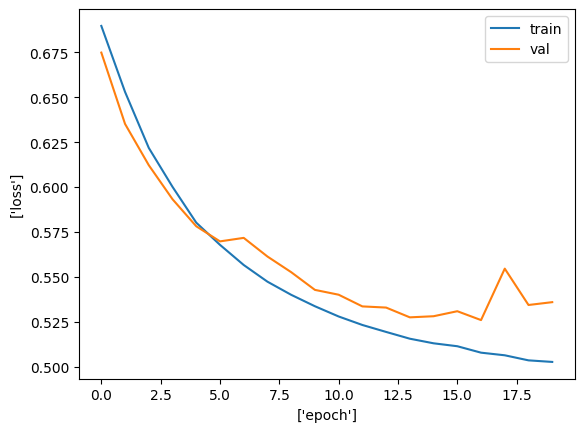

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel(['epoch'])
plt.ylabel(['loss'])
plt.legend(['train', 'val'])
plt.show()

검증 손실이 더 감소되지 않아 훈련이 적절히 조기 조